In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Oil_Price = pd.read_csv('crude-oil-price.csv')

In [3]:
Oil_Price

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62
...,...,...,...,...
464,2021-11-01T00:00:00,65.85,-19.479090,-15.93
465,2021-12-01T00:00:00,74.88,13.712984,9.03
466,2022-01-03T00:00:00,86.49,15.504808,11.61
467,2022-02-01T00:00:00,95.72,10.671754,9.23


# **EDA**

In [4]:
Oil_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           469 non-null    object 
 1   price          469 non-null    float64
 2   percentChange  468 non-null    float64
 3   change         468 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.8+ KB


In [5]:
Oil_Price['date'] = Oil_Price['date'].apply(lambda x: pd.to_datetime(x).date())

In [6]:
Oil_Price

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62
...,...,...,...,...
464,2021-11-01,65.85,-19.479090,-15.93
465,2021-12-01,74.88,13.712984,9.03
466,2022-01-03,86.49,15.504808,11.61
467,2022-02-01,95.72,10.671754,9.23


In [7]:
Oil_Price.fillna(value=0,inplace=True)

In [8]:
Oil_Price

,date,price,percentChange,change
0,1983-03-30,29.27,0.000000,0.00
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62
...,...,...,...,...
464,2021-11-01,65.85,-19.479090,-15.93
465,2021-12-01,74.88,13.712984,9.03
466,2022-01-03,86.49,15.504808,11.61
467,2022-02-01,95.72,10.671754,9.23


In [9]:
Oil_Price.isnull().sum()

date             0
price            0
percentChange    0
change           0
dtype: int64

In [10]:
Oil_Price.describe()

,price,percentChange,change
count,469.000000,469.000000,469.000000
mean,44.071641,0.836879,0.170704
std,28.376748,10.674396,4.949285
min,10.420000,-54.244861,-32.830000
25%,20.270000,-5.026455,-1.630000
50%,30.830000,0.930406,0.280000
75%,63.580000,6.489881,2.310000
max,140.000000,88.375796,16.650000


In [11]:
Oil_Price.corr()

,price,percentChange,change
price,1.000000,0.078788,0.118040
percentChange,0.078788,1.000000,0.824838
change,0.118040,0.824838,1.000000


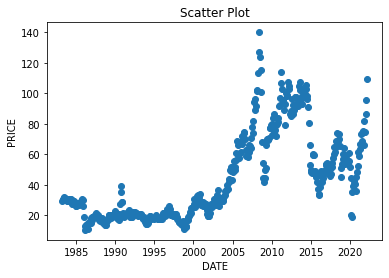

In [12]:
plt.scatter(Oil_Price['date'],Oil_Price['price'])

plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.title('Scatter Plot')

plt.show()

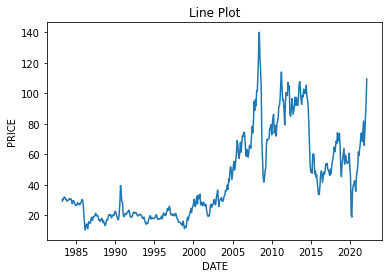

In [13]:
plt.plot(Oil_Price['date'],Oil_Price['price'])

plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.title('Line Plot')

plt.show()

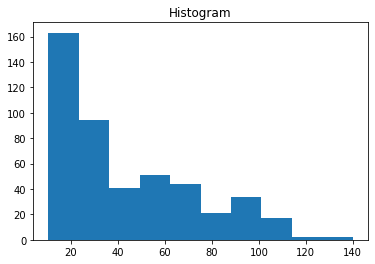

In [14]:
plt.hist(Oil_Price['price'])


plt.title('Histogram')

plt.show()


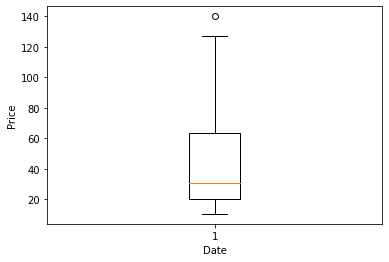

In [15]:
#specifying the date column as the x-axis and the price column as the y-axis
x= Oil_Price['date']
y= Oil_Price['price']

#Creating the box plot
fig, ax = plt.subplots()
ax.boxplot(y)

#x-axis label
ax.set_xlabel('Date')

#y-axis label
ax.set_ylabel('Price')

#plot
plt.show()

In [16]:
#Performing data smoothing

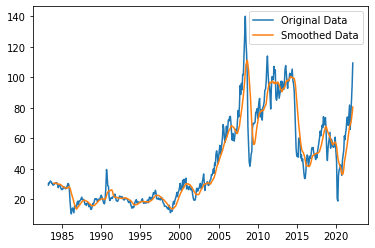

In [17]:
#1. Simple moving average

#10-day simple moving average of the price column
Oil_Price['sma_10']= Oil_Price['price'].rolling(window=10).mean()

#plot of original data and smoothed data
plt.plot(Oil_Price['date'],Oil_Price['price'],label='Original Data')
plt.plot(Oil_Price['date'],Oil_Price['sma_10'],label='Smoothed Data')

plt.legend()
plt.show()

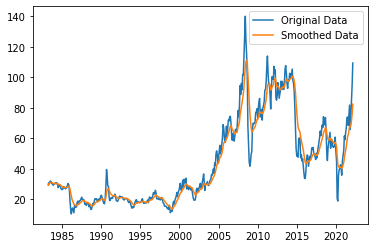

In [18]:
#2.Exponential smoothing

#exponential smoothed values of the price column
Oil_Price['exp_smooth']= Oil_Price['price'].ewm(span=10).mean()

#plot of original data and smoothed data
plt.plot(Oil_Price['date'],Oil_Price['price'],label='Original Data')
plt.plot(Oil_Price['date'],Oil_Price['exp_smooth'],label='Smoothed Data')

plt.legend()
plt.show()